In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 800)
import seaborn as sns
pd.set_option('display.max_columns', 999)

from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from scipy.stats import linregress
from api_keys import g_key
import gmaps
import os

In [3]:
cia= pd.read_csv('../Resources/Factbookdata.csv')
cleanHappy= pd.read_csv('../Resources/cleanAndHappy.csv')


In [4]:
cia

,Country,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
0,world,86.2,12.0,43.0,83.0,NaN,17500.0,27.9,7.7,NaN,91.1,67.7,NaN,NaN,NaN,1.01,69.80,2.42,52.5,30.6,NaN,NaN,NaN,NaN,356000.0,NaN,NaN,NaN,840.0
1,afghanistan,38.2,10.0,10.6,84.1,presidential Islamic republic,2000.0,22.7,23.9,54.5,55.3,31.9,5.5,25.0,-0.6,1.03,52.10,5.02,88.8,19.0,33.0,65.0,N,E,0.0,5987.00,0.000000,2.07,1884.0
2,akrotiri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,32.0,N,E,56.3,48.00,0.539789,NaN,NaN
3,albania,97.6,15.0,66.4,100.0,parliamentary republic,12500.0,15.9,13.8,14.3,83.6,93.2,21.7,1.5,-3.3,0.98,78.60,1.52,44.0,33.4,41.0,20.0,N,E,362.0,691.00,0.343780,28.12,708.0
4,algeria,80.2,14.0,42.9,99.4,presidential republic,15200.0,37.8,11.7,23.0,83.6,87.6,27.4,3.0,-0.9,1.03,77.20,2.66,52.7,28.3,28.0,3.0,N,E,998.0,6734.00,0.129074,0.80,800.0
5,american_samoa,NaN,NaN,31.3,59.0,presidential democracy; a self-governing terri...,11200.0,NaN,29.8,NaN,100.0,62.5,NaN,NaN,-26.6,1.00,73.90,2.57,NaN,26.1,14.0,170.0,S,W,116.0,0.00,1.000000,78.10,NaN
6,andorra,100.0,NaN,97.9,100.0,parliamentary democracy (since March 1993) tha...,49900.0,NaN,3.7,NaN,100.0,100.0,25.6,NaN,0.0,1.06,82.90,1.41,NaN,44.9,42.0,1.0,N,E,0.0,118.00,0.000000,34.00,1996.0
7,angola,71.1,10.0,13.0,40.5,presidential republic,6800.0,28.6,6.6,36.6,49.0,51.6,8.2,19.0,0.1,0.95,60.60,6.09,97.6,15.9,12.0,18.0,S,E,1600.0,5369.00,0.229588,46.30,1112.0
8,anguilla,NaN,NaN,81.6,NaN,parliamentary democracy (House of Assembly); s...,12200.0,NaN,8.0,23.0,94.6,97.9,NaN,NaN,11.5,0.90,81.60,1.74,NaN,35.1,18.0,63.0,N,W,61.0,0.00,1.000000,61.10,NaN
9,antarctica,NaN,NaN,100.0,NaN,Antarctic Treaty Summary - the Antarctic regio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.0,S,E,17968.0,NaN,NaN,NaN,2300.0


In [5]:
cia_filtered= cia.loc[:,['Country','literacy','internetpercent','electricpercent','governmenttype','unemployment','belowpoverty','obesityrate','sexratioM2F','fertilityrate','coastpercent','latitude','longitude']].copy()
cia_filtered
cia_filtered= cia_filtered.dropna(axis = 0, how ='any') 
cia_filtered
cia_filtered['Country'] = cia_filtered['Country'].str.capitalize().str.replace("_", " ")
cia_filtered

,Country,literacy,internetpercent,electricpercent,governmenttype,unemployment,belowpoverty,obesityrate,sexratioM2F,fertilityrate,coastpercent,latitude,longitude
1,Afghanistan,38.2,10.6,84.1,presidential Islamic republic,23.9,54.5,5.5,1.03,5.02,0.000000,33.0,65.0
3,Albania,97.6,66.4,100.0,parliamentary republic,13.8,14.3,21.7,0.98,1.52,0.343780,41.0,20.0
4,Algeria,80.2,42.9,99.4,presidential republic,11.7,23.0,27.4,1.03,2.66,0.129074,28.0,3.0
7,Angola,71.1,13.0,40.5,presidential republic,6.6,36.6,8.2,0.95,6.09,0.229588,12.0,18.0
12,Argentina,99.1,70.2,100.0,presidential republic,8.4,25.7,28.3,0.98,2.25,0.294215,34.0,64.0
13,Armenia,99.7,62.0,100.0,parliamentary democracy; note - constitutional...,18.9,32.0,20.2,0.94,1.64,0.000000,40.0,45.0
19,Azerbaijan,99.8,78.2,100.0,presidential republic,5.0,4.9,19.9,0.98,1.89,0.000000,40.0,47.0
22,Bangladesh,72.9,18.2,75.9,parliamentary republic,4.4,24.3,3.6,0.97,2.15,0.116163,24.0,90.0
24,Belarus,99.7,71.1,100.0,"presidential republic in name, although in fac...",0.8,5.7,24.5,0.87,1.49,0.000000,53.0,28.0
27,Benin,38.4,12.0,41.4,presidential republic,1.0,36.2,9.6,1.01,4.67,0.053922,9.0,2.0


In [35]:
cia_filtered.groupby(['governmenttype']).count()

,Country,literacy,internetpercent,electricpercent,unemployment,belowpoverty,obesityrate,sexratioM2F,fertilityrate,coastpercent,latitude,longitude
governmenttype,,,,,,,,,,,,
absolute monarchy,1,1,1,1,1,1,1,1,1,1,1,1
communist party-led state,1,1,1,1,1,1,1,1,1,1,1,1
communist state,2,2,2,2,2,2,2,2,2,2,2,2
constitutional monarchy,3,3,3,3,3,3,3,3,3,3,3,3
"federal parliamentary constitutional monarchy\nnote: all Peninsular Malaysian states have hereditary rulers (commonly referred to as sultans) except Melaka (Malacca) and Pulau Pinang (Penang); those two states along with Sabah and Sarawak in East Malaysia have governors appointed by government; powers of state governments are limited by the federal constitution; under terms of federation, Sabah and Sarawak retain certain constitutional prerogatives (e.g., right to maintain their own immigration controls)",1,1,1,1,1,1,1,1,1,1,1,1
federal parliamentary republic,5,5,5,5,5,5,5,5,5,5,5,5
federal presidential republic,5,5,5,5,5,5,5,5,5,5,5,5
federation of monarchies,1,1,1,1,1,1,1,1,1,1,1,1
in transition,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
cleanHappy= cleanHappy.loc[:,['Overall Rank','Country','Happiness Score','GDP per Capita','Family','Life Expectancy', 'Freedom','Generosity','Perceptions of corruption','Year']]
cleanHappy= cleanHappy.drop(['Overall Rank'], axis=1)
cleanHappy


,Country,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,Switzerland,7.587,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2015
1,Iceland,7.561,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2015
2,Denmark,7.527,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2015
3,Norway,7.522,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2015
4,Canada,7.427,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2015
5,Finland,7.406,1.290250,1.318260,0.889110,0.641690,0.233510,0.413720,2015
6,Netherlands,7.378,1.329440,1.280170,0.892840,0.615760,0.476100,0.318140,2015
7,Sweden,7.364,1.331710,1.289070,0.910870,0.659800,0.362620,0.438440,2015
8,New Zealand,7.286,1.250180,1.319670,0.908370,0.639380,0.475010,0.429220,2015
9,Australia,7.284,1.333580,1.309230,0.931560,0.651240,0.435620,0.356370,2015


In [7]:
cleanHappy_averaged= cleanHappy.groupby('Country').mean().drop(['Year'], axis=1)
cleanHappy_averaged

,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption
Country,,,,,,,
Afghanistan,3.590250,0.358892,0.382941,0.228134,0.147405,0.295163,0.066367
Albania,4.711000,0.936541,0.731664,0.766120,0.369122,0.165358,0.047251
Algeria,5.781750,1.015704,1.052757,0.635071,0.201546,0.068274,0.154124
Angola,3.872250,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570
Argentina,6.552750,1.115794,1.305700,0.730869,0.484275,0.098964,0.067885
Armenia,4.351750,0.836417,0.849841,0.668564,0.199286,0.079242,0.032459
Australia,7.288250,1.400606,1.374258,0.884162,0.617054,0.437097,0.320716
Austria,7.116000,1.403927,1.336204,0.850600,0.588162,0.304501,0.211325
Azerbaijan,5.234500,1.081305,1.002938,0.582316,0.387931,0.052665,0.174194


In [8]:
joint_df= cleanHappy_averaged.merge(cia_filtered, on='Country', how='inner')
joint_df= joint_df.drop_duplicates()
joint_df

,Country,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,literacy,internetpercent,electricpercent,governmenttype,unemployment,belowpoverty,obesityrate,sexratioM2F,fertilityrate,coastpercent,latitude,longitude
0,Afghanistan,3.590250,0.358892,0.382941,0.228134,0.147405,0.295163,0.066367,38.2,10.6,84.1,presidential Islamic republic,23.9,54.5,5.5,1.03,5.02,0.000000,33.0,65.0
1,Albania,4.711000,0.936541,0.731664,0.766120,0.369122,0.165358,0.047251,97.6,66.4,100.0,parliamentary republic,13.8,14.3,21.7,0.98,1.52,0.343780,41.0,20.0
2,Algeria,5.781750,1.015704,1.052757,0.635071,0.201546,0.068274,0.154124,80.2,42.9,99.4,presidential republic,11.7,23.0,27.4,1.03,2.66,0.129074,28.0,3.0
3,Angola,3.872250,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570,71.1,13.0,40.5,presidential republic,6.6,36.6,8.2,0.95,6.09,0.229588,12.0,18.0
4,Argentina,6.552750,1.115794,1.305700,0.730869,0.484275,0.098964,0.067885,99.1,70.2,100.0,presidential republic,8.4,25.7,28.3,0.98,2.25,0.294215,34.0,64.0
5,Armenia,4.351750,0.836417,0.849841,0.668564,0.199286,0.079242,0.032459,99.7,62.0,100.0,parliamentary democracy; note - constitutional...,18.9,32.0,20.2,0.94,1.64,0.000000,40.0,45.0
6,Azerbaijan,5.234500,1.081305,1.002938,0.582316,0.387931,0.052665,0.174194,99.8,78.2,100.0,presidential republic,5.0,4.9,19.9,0.98,1.89,0.000000,40.0,47.0
7,Bangladesh,4.611250,0.514496,0.565920,0.560943,0.466084,0.182199,0.129809,72.9,18.2,75.9,parliamentary republic,4.4,24.3,3.6,0.97,2.15,0.116163,24.0,90.0
8,Belarus,5.666750,1.089524,1.306441,0.676209,0.318173,0.126504,0.168946,99.7,71.1,100.0,"presidential republic in name, although in fac...",0.8,5.7,24.5,0.87,1.49,0.000000,53.0,28.0
9,Benin,3.655500,0.372681,0.316337,0.244828,0.436983,0.188837,0.068710,38.4,12.0,41.4,presidential republic,1.0,36.2,9.6,1.01,4.67,0.053922,9.0,2.0


In [9]:
joint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    102 non-null    object 
 1   Happiness Score            102 non-null    float64
 2   GDP per Capita             102 non-null    float64
 3   Family                     102 non-null    float64
 4   Life Expectancy            102 non-null    float64
 5   Freedom                    102 non-null    float64
 6   Generosity                 102 non-null    float64
 7   Perceptions of corruption  102 non-null    float64
 8   literacy                   102 non-null    float64
 9   internetpercent            102 non-null    float64
 10  electricpercent            102 non-null    float64
 11  governmenttype             102 non-null    object 
 12  unemployment               102 non-null    float64
 13  belowpoverty               102 non-null    float64

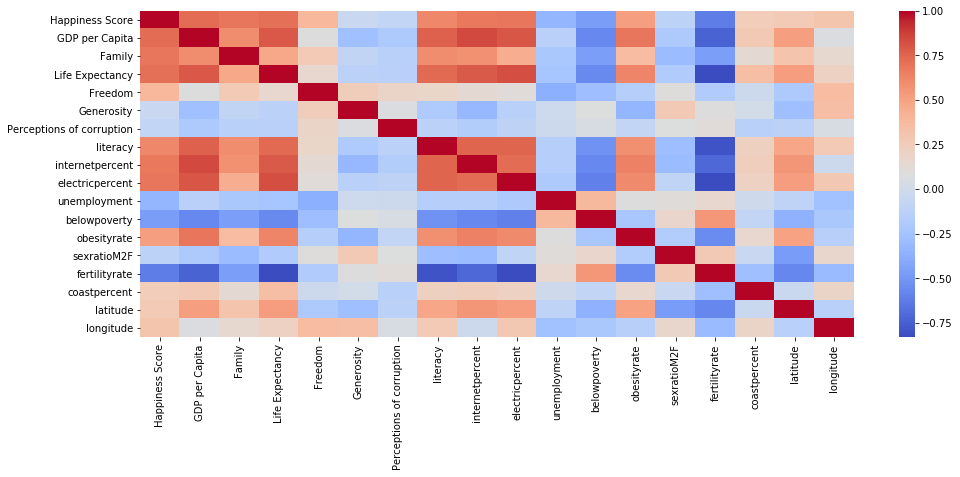

In [10]:
heat= joint_df.corr();
plt.figure(figsize=(16, 6))
sns.heatmap(heat, cmap='coolwarm')

In [11]:
#heat_corr = heat.corr()
#heat_corr.unstack().sort_values()



In [12]:
corr_matrix = joint_df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

GDP per Capita             internetpercent              0.843789
Life Expectancy            electricpercent              0.832990
electricpercent            fertilityrate                0.829813
Life Expectancy            fertilityrate                0.829534
GDP per Capita             electricpercent              0.802018
literacy                   fertilityrate                0.799466
GDP per Capita             Life Expectancy              0.794896
Life Expectancy            internetpercent              0.788911
GDP per Capita             literacy                     0.764594
literacy                   internetpercent              0.753313
                           electricpercent              0.751417
Life Expectancy            literacy                     0.742376
GDP per Capita             fertilityrate                0.735149
internetpercent            electricpercent              0.724503
Happiness Score            GDP per Capita               0.723418
                         

In [13]:
cor_df = pd.DataFrame(sol, columns = ['factor'])
cor_df
#cor_df = cor_df[cor_df['factor 1'].str.contains("Happiness Score")] 

,,factor
GDP per Capita,internetpercent,0.843789
Life Expectancy,electricpercent,0.832990
electricpercent,fertilityrate,0.829813
Life Expectancy,fertilityrate,0.829534
GDP per Capita,electricpercent,0.802018
literacy,fertilityrate,0.799466
GDP per Capita,Life Expectancy,0.794896
Life Expectancy,internetpercent,0.788911
GDP per Capita,literacy,0.764594
literacy,internetpercent,0.753313


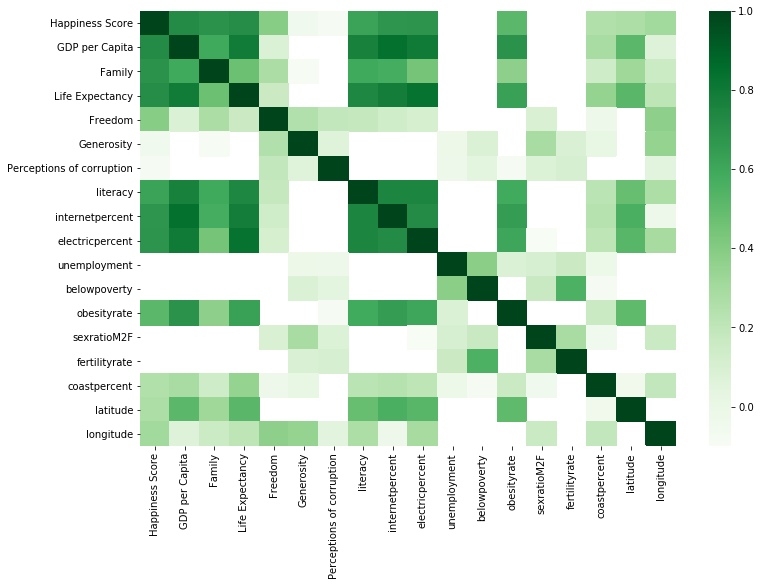

In [14]:
corr = joint_df.corr()

kot = corr[corr>=-.1]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

<Figure size 100000x100000 with 0 Axes>

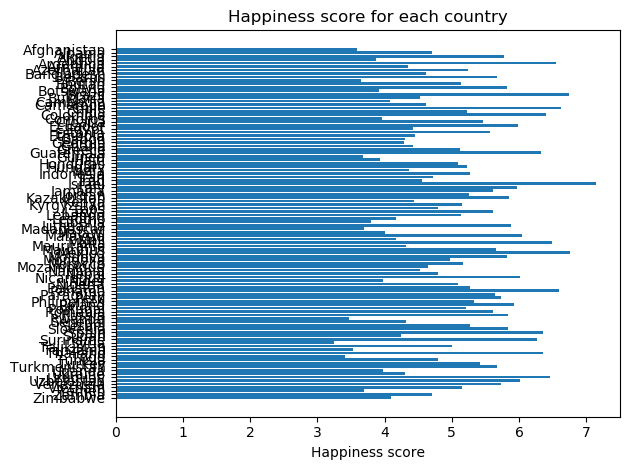

In [15]:
country_list= []
happiness_score=[]
for index, rows in joint_df.iterrows():
    country= rows['Country']
    score= rows['Happiness Score']
    country_list.append(country)
    happiness_score.append(score)
    
    
plt.rcdefaults()
plt.figure(figsize=(1000, 1000))
fig, ax = plt.subplots()



y_pos = np.arange(len(country_list))
tick_locations = [value for value in y_pos]
ax.barh(y_pos, happiness_score, align='center')
ax.set_yticks(tick_locations)
ax.set_yticklabels(country_list)
ax.invert_yaxis() 
ax.set_xlabel('Happiness score')
ax.set_title('Happiness score for each country')
plt.tight_layout()


In [16]:
test= joint_df[["Country","Happiness Score"]]

# Set the index to be "State" so they will be used as labels
test = test.set_index("Country")
test= test.sort_values(by= ['Happiness Score'], ascending=False)
test

,Happiness Score
Country,
Israel,7.143000
Mexico,6.757750
Brazil,6.747250
Chile,6.625750
Panama,6.592250
Argentina,6.552750
Malta,6.486000
Uruguay,6.465750
Colombia,6.393750


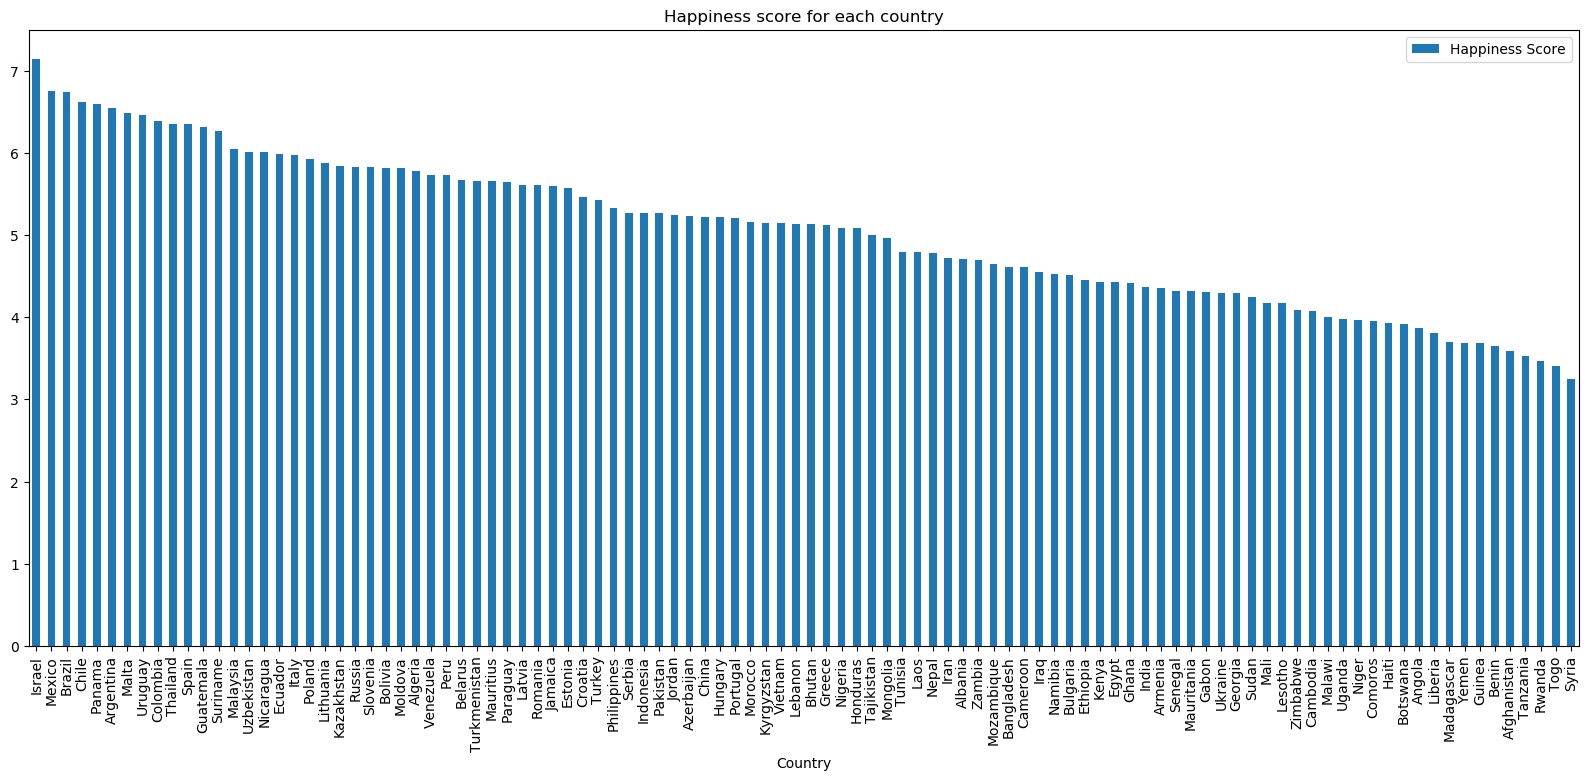

<Figure size 640x480 with 0 Axes>

In [17]:
test.plot(kind="bar", figsize=(20,8))

# Set a title for the chart
plt.title("Happiness score for each country")

plt.show()
plt.tight_layout()

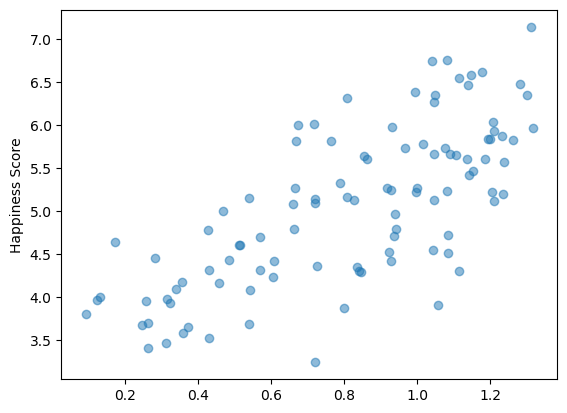

In [18]:

y= joint_df['Happiness Score']
x_corruption= joint_df['GDP per Capita' ]
plt.scatter(x_corruption,y, alpha= 0.5, label= 'country')
#plt.xlabel(f'{columns}')
plt.ylabel("Happiness Score")
plt.show()

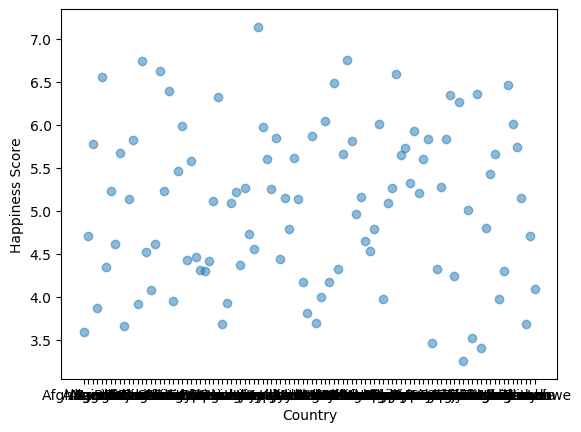

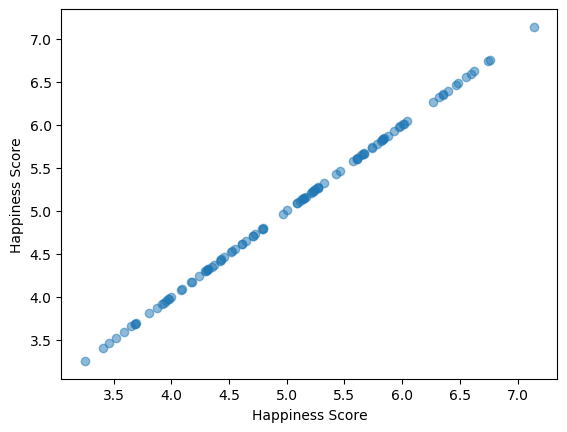

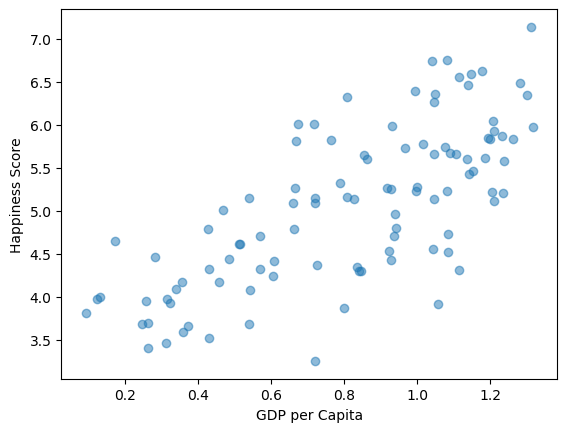

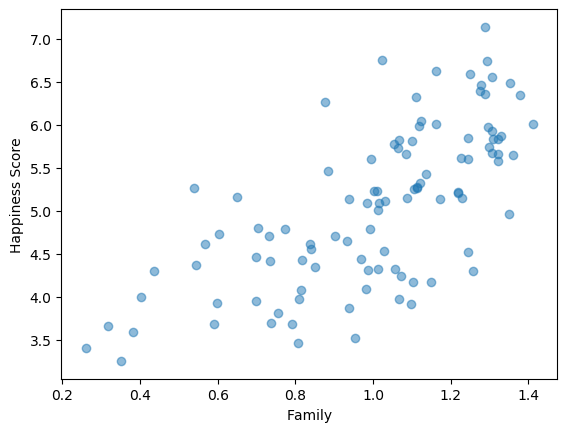

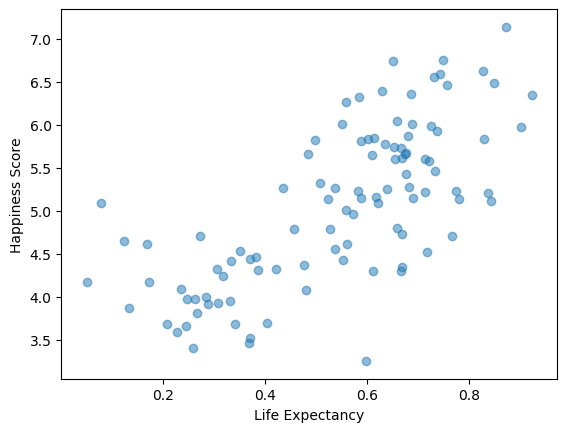

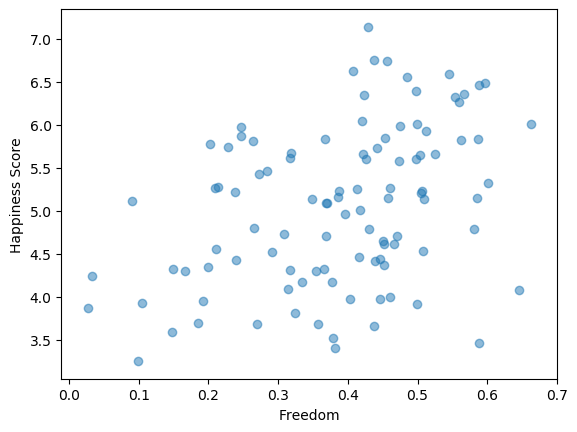

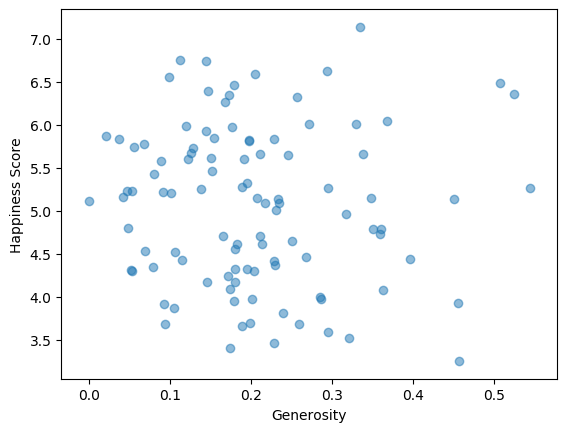

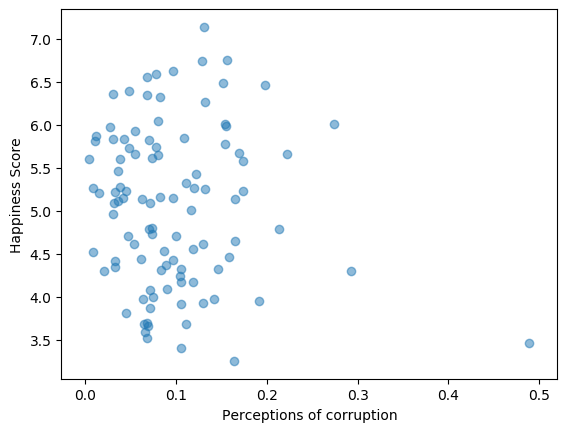

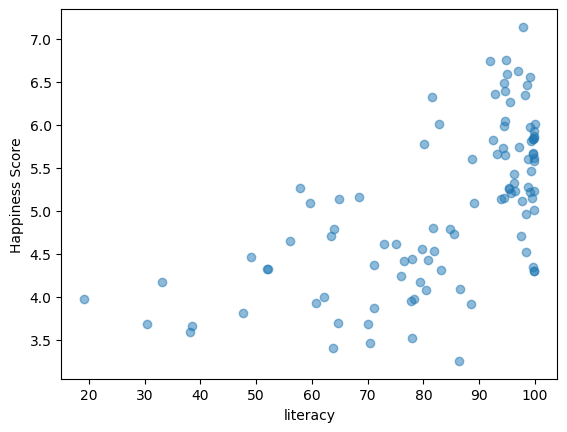

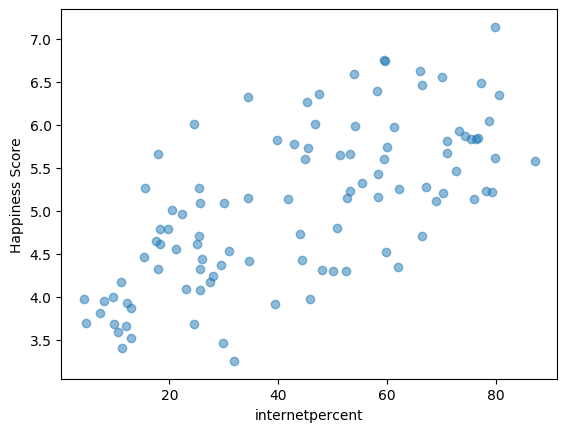

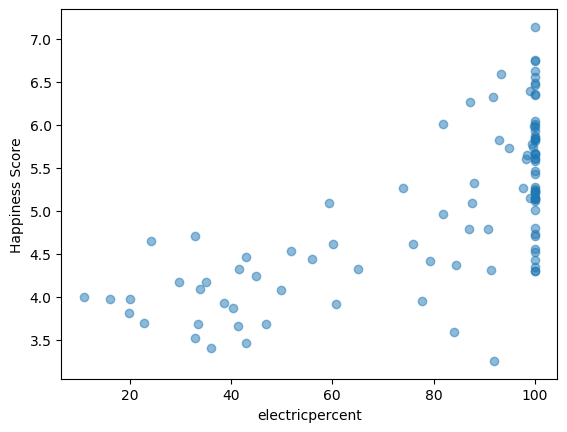

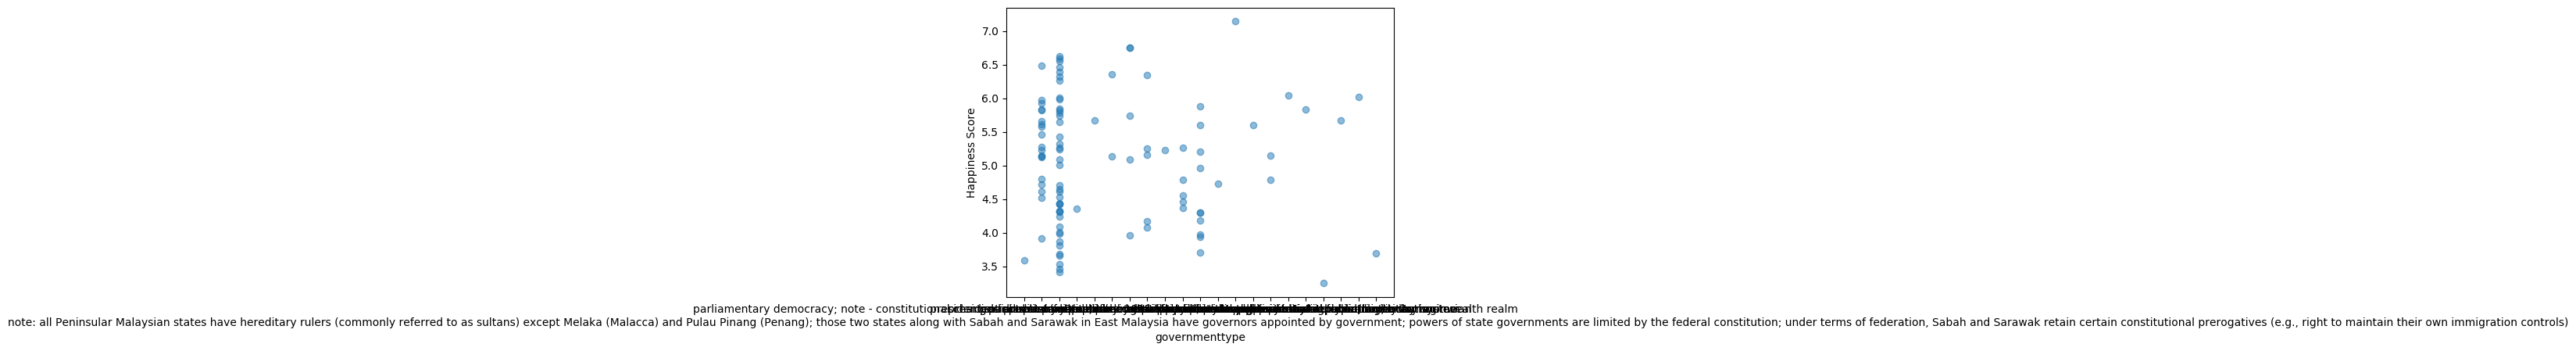

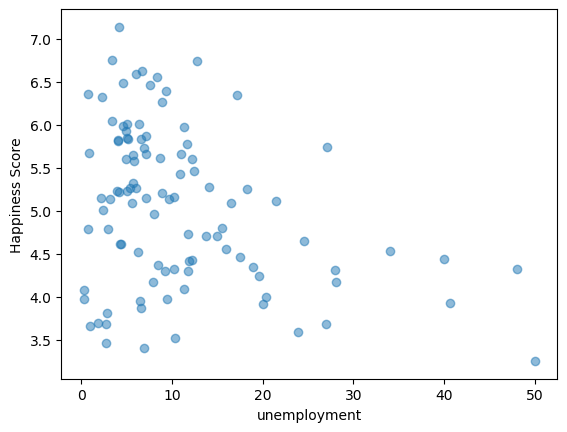

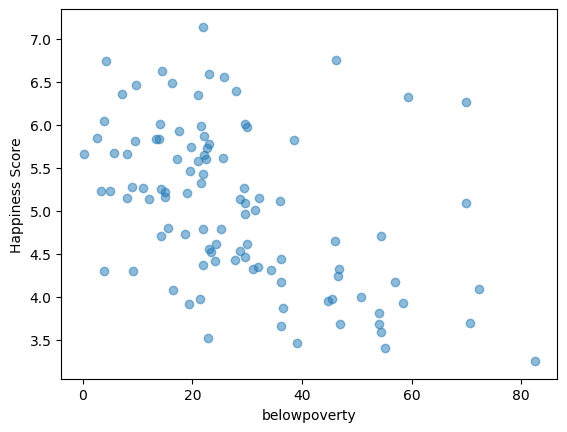

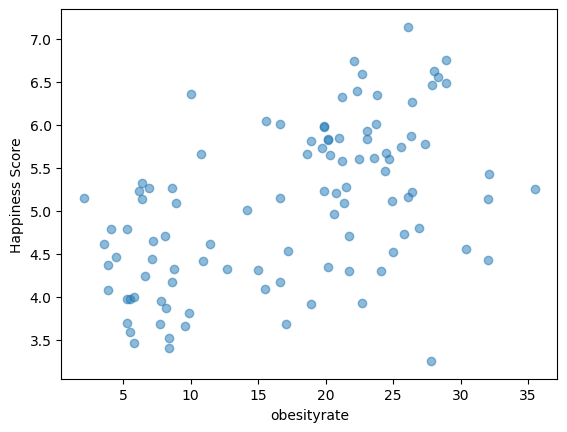

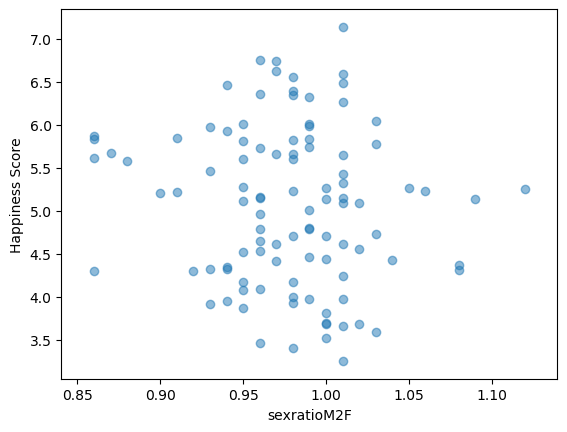

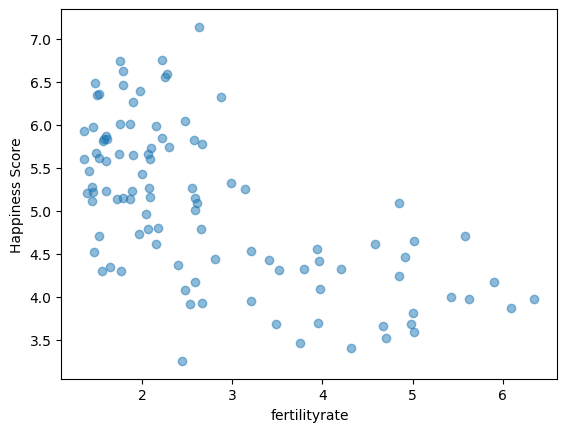

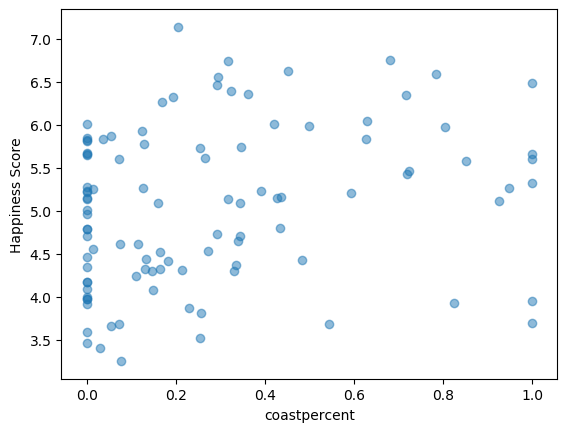

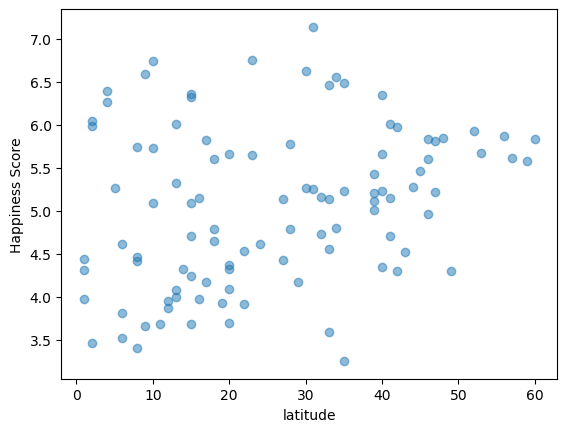

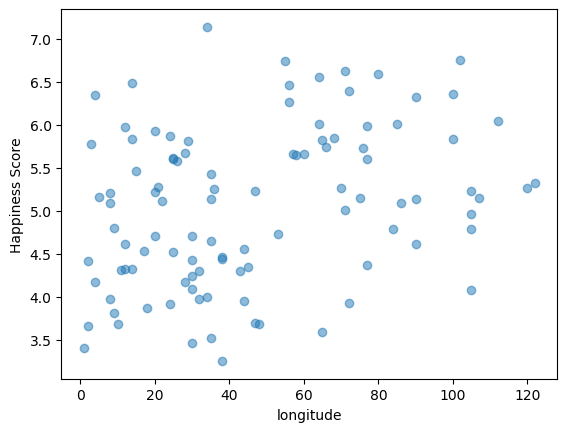

In [19]:
for columns in joint_df.columns:
    y= joint_df['Happiness Score']
    x_corruption= joint_df[f'{columns}']
    plt.scatter(x_corruption,y, alpha= 0.5, label= 'country')
    plt.xlabel(f'{columns}')
    plt.ylabel("Happiness Score")
    plt.show()
    

In [31]:
def scatterplot (y, x):
    y= joint_df['Happiness Score']
    x= joint_df[f'{columns}']
    plt.scatter(x,y, alpha= 0.5, label= 'country')
    plt.xlabel(f'{columns}')
    plt.ylabel("Happiness Score")
    plt.show()
    
def linearregression(xax,yax):
    (slope, intercept, rvalue,pvalue, stderr) = linregress(xax, yax)
    regress_values = xax * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xax,yax)
    plt.plot(xax,regress_values,"r-")
    print(line_eq)
    plt.show()

y = 0.26x + -0.52


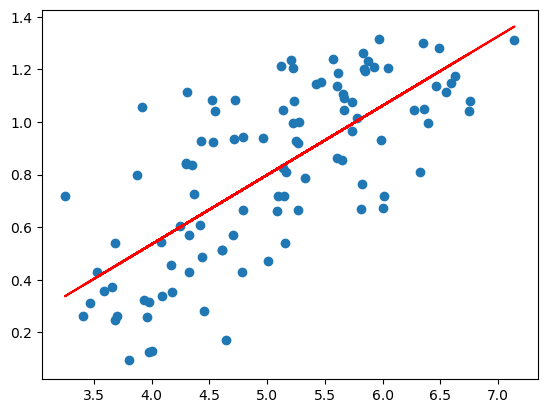

In [32]:
linearregression(joint_df['Happiness Score'],joint_df['GDP per Capita' ])


In [22]:
#for columns in joint_df.columns:
    #y= joint_df['Happiness Score']
    #x= joint_df[f'{columns}']
    #linearregression(y,x)

In [23]:
#for columns in joint_df.columns:
    #yax= joint_df['Happiness Score']
    #xax= joint_df[f'{columns}']
    
    #(slope, intercept, rvalue,pvalue, stderr) = linregress(xax, yax)
    #regress_values = xax * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.scatter(xax,yax)
    #plt.plot(xax,regress_values,"r-")

In [24]:
city_info = []

for indx, row in joint_df.iterrows():
    info_box = f"""
                <dl>
                <dt>Name</dt><dd>{row.Country}</dd>
                <dt>Happy_score</dt><dd>{row['Happiness Score']}</dd>
                <dt>GDP</dt><dd>{row['GDP per Capita']}%</dd>
                </dl>
                """
    city_info.append(info_box)

In [25]:
gmaps.configure(api_key= g_key)
fig= gmaps.figure() 
locations= joint_df[['latitude','longitude']]
markers_layer = gmaps.marker_layer(locations, info_box_content=city_info)
fig.add_layer(markers_layer)
fig

Figure(layout=FigureLayout(height='420px'))